In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [133]:
# read iris data
df = pd.read_csv('iris.data', header = None, encoding='utf-8')

# define columns
df.columns = ['sepal length in cm', 
              'sepal width in cm', 
              'petal length in cm',
              'petal width in cm' ,
              'class label']

# delete missing values (NaN values)
df.dropna(how="all", inplace=True)

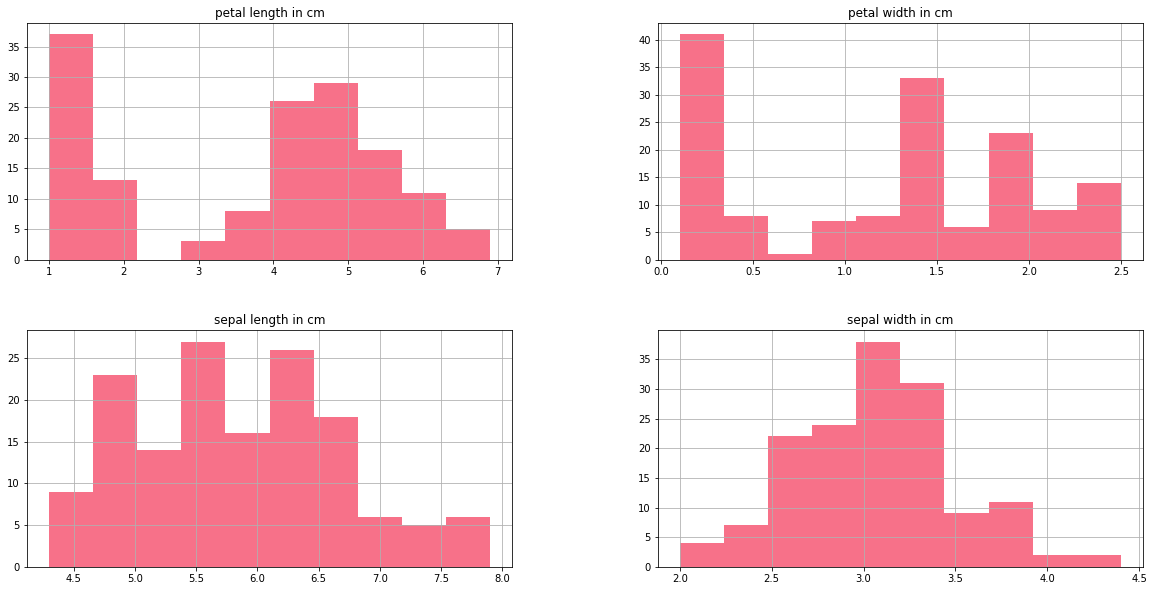

In [134]:
# generate histogram and save into a file

df.hist(figsize=(20, 10), alpha = 1)
#plt.savefig('iris_histogram.png')
plt.show()

In [137]:
# separate variables from class to train
X = df.iloc[:,[0,1,2,3]].values
y = df.iloc[:, 4].values

# LDA
sklearn_lda = LDA(n_components = 2)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)

# set integers as classes identifier
le = preprocessing.LabelEncoder()
le.fit(y)
t = le.transform(y) + 1

d = dict(zip(t,y))
print(d)

# generate a new dataframe of the training data
ds = pd.DataFrame(X_lda_sklearn)
ds['class label'] = y
ds.columns = ['LD1', 'LD2', 'class label']

{1: 'Iris-setosa', 2: 'Iris-versicolor', 3: 'Iris-virginica'}


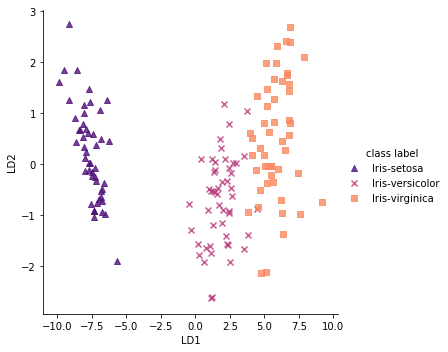

In [138]:
# plot data
markers = ['^', 'x','s']
sns.lmplot(x = 'LD1', y = 'LD2', data = ds, hue = 'class label', 
           markers = markers, palette='magma', fit_reg = False, legend=True)
plt.show()